**Kwaku Amo-Korankye**<br>**Image Pipeline**

In [ ]:
import torch
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [58]:
# Define class labels
classes = ['pituitary', 'bone fractured', 'healthy brain', 'adenocarcinoma', 'glioma', 'benign', 'breast cancer positive', 'bone not fractured', 'squamous cell carcinoma', 'meningioma', 'breast cancer negative']

# Define image transformations (same as validation set)
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])


# Load the trained model
comprehensive_model = torch.load("/Users/academiccity/Documents/amokorankye/front end/server/comprehensive_model.pth", weights_only=False )
comprehensive_model.eval()  # Set to evaluation mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [59]:
def predict(image_path, diagnosisArea):
    """
    Predict brain tumor classification for multiple image types
    Supports: jpg, jpeg, png, bmp, tiff
    """
    # Supported image extensions
    SUPPORTED_FORMATS = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    
    try:
        # Validate file extension
        file_ext = os.path.splitext(image_path)[1].lower()
        if file_ext not in SUPPORTED_FORMATS:
            raise ValueError(f"Unsupported image format. Supported formats: {', '.join(SUPPORTED_FORMATS)}")

        # Load image using PIL first (handles multiple formats better)
        pil_image = Image.open(image_path)
        
        # Convert to RGB if needed
        if pil_image.mode != 'RGB':
            pil_image = pil_image.convert('RGB')
            
        image = pil_image
        
        # Apply transformations
        transformed = transform(image)
        # Add batch dimension and ensure it's the right shape
        image_tensor = transformed.unsqueeze(0)

        # Move tensor to same device as model
        device = next(comprehensive_model.parameters()).device
        image_tensor = image_tensor.to(device)

        # Perform inference
        with torch.no_grad():
            output = comprehensive_model(image_tensor)
            predicted_class = torch.argmax(output, dim=1).item()
            probabilities = torch.nn.functional.softmax(output, dim=1)
            confidence = probabilities[0, predicted_class].item()

        # Return detailed results
        # Filter classes based on diagnosisArea
        if diagnosisArea == "Brain Tumors":
            relevant_classes = ['pituitary', 'healthy brain', 'glioma', 'meningioma']
            filtered_probabilities = {
            cls: probabilities[0, classes.index(cls)].item()
            for cls in relevant_classes
            }
            
            # Find the highest probability among relevant classes
            relevant_probs = torch.tensor([probabilities[0, classes.index(cls)] for cls in relevant_classes])
            filtered_predicted_class = relevant_classes[torch.argmax(relevant_probs).item()]
            filtered_confidence = torch.max(relevant_probs).item()
            
            result = {
            'diagnosis': filtered_predicted_class,
            'confidence': filtered_confidence,
            'probabilities': filtered_probabilities
            }

        elif diagnosisArea == "Breast Cancer":
            relevant_classes = ['breast cancer negative', 'breast cancer positive']
            filtered_probabilities = {
            cls: probabilities[0, classes.index(cls)].item()
            for cls in relevant_classes
            }
            
            # Find the highest probability among relevant classes
            relevant_probs = torch.tensor([probabilities[0, classes.index(cls)] for cls in relevant_classes])
            filtered_predicted_class = relevant_classes[torch.argmax(relevant_probs).item()]
            filtered_confidence = torch.max(relevant_probs).item()
            
            result = {
            'diagnosis': filtered_predicted_class,
            'confidence': filtered_confidence,
            'probabilities': filtered_probabilities
            }

        elif diagnosisArea == "Bone Fractures":
            relevant_classes = ['bone fractured', 'bone not fractured']
            filtered_probabilities = {
            cls: probabilities[0, classes.index(cls)].item()
            for cls in relevant_classes
            }
            
            # Find the highest probability among relevant classes
            relevant_probs = torch.tensor([probabilities[0, classes.index(cls)] for cls in relevant_classes])
            filtered_predicted_class = relevant_classes[torch.argmax(relevant_probs).item()]
            filtered_confidence = torch.max(relevant_probs).item()
            
            result = {
            'diagnosis': filtered_predicted_class,
            'confidence': filtered_confidence,
            'probabilities': filtered_probabilities
            }

        elif diagnosisArea == "Lung Cancer":
            relevant_classes = ['adenocarcinoma', 'benign', 'squamous cell carcinoma']
            filtered_probabilities = {
            cls: probabilities[0, classes.index(cls)].item()
            for cls in relevant_classes
            }
            
            # Find the highest probability among relevant classes
            relevant_probs = torch.tensor([probabilities[0, classes.index(cls)] for cls in relevant_classes])
            filtered_predicted_class = relevant_classes[torch.argmax(relevant_probs).item()]
            filtered_confidence = torch.max(relevant_probs).item()
            
            result = {
            'diagnosis': filtered_predicted_class,
            'confidence': filtered_confidence,
            'probabilities': filtered_probabilities
            }        
        else:
            # Default behavior for other areas or when no area is specified
            result = {
            'diagnosis': classes[predicted_class],
            'confidence': confidence,
            'probabilities': {
                classes[i]: probabilities[0, i].item() 
                for i in range(len(classes))
            }
            }
        
        # Print formatted results
        print(f"\nDiagnosis Results:")

        print(f"Classification: {result['diagnosis']}")
        print(f"Confidence: {result['confidence']:.2%}")
        print(f"\nClass Probabilities:")
        for cls, prob in result['probabilities'].items():
            print(f"{cls}: {prob:.2%}")
            
        return result

    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found")
        return None
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        return None

In [60]:
def apply_gradcam(image_path, model=comprehensive_model, target_layer=comprehensive_model.layer4[-1]):
    # Set up GradCAM
    class GradCAM:
        def __init__(self, model, target_layer):
            self.model = model
            self.target_layer = target_layer
            self.gradients = None
            self.features = None
            
            # Register hooks
            self.target_layer.register_forward_hook(self.save_features)
            self.target_layer.register_full_backward_hook(self.save_gradients)
        
        def save_features(self, module, input, output):
            self.features = output
            
        def save_gradients(self, module, grad_input, grad_output):
            self.gradients = grad_output[0]
            
        def generate(self, input_image):
            # Forward pass
            model_output = self.model(input_image)
            predicted_class = torch.argmax(model_output)
            
            # Backward pass
            model_output[:, predicted_class].backward()
            
            # Generate CAM
            pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
            for i in range(self.features.shape[1]):
                self.features[:, i, :, :] *= pooled_gradients[i]
            
            cam = torch.mean(self.features, dim=1).squeeze()
            cam = torch.maximum(cam, torch.zeros_like(cam))  # ReLU
            cam = (cam - cam.min()) / (cam.max() - cam.min())  # Normalize
            
            return cam.detach(), predicted_class  # Detach here

    try:
        # Load image using OpenCV
        image = cv2.imread(image_path)  # OpenCV loads as BGR NumPy array
        if image is None:
            raise ValueError(f"Could not read image from {image_path}")
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        original_size = image.shape[:2]  # Store original size (H, W)

        # Convert NumPy array to PIL Image (required for torchvision transforms)
        pil_image = Image.fromarray(image)

        # Apply transformations
        transformed = transform(pil_image)  # Now it's a PyTorch tensor (C, H, W)
        input_tensor = transformed.unsqueeze(0)  # Add batch dimension (1, C, H, W)

        # Initialize GradCAM
        grad_cam = GradCAM(model, target_layer)

        # Generate heatmap
        cam, predicted_class = grad_cam.generate(input_tensor)
        cam = cam.cpu().numpy()  # Convert to NumPy array

        # Resize heatmap to match original image size
        cam = cv2.resize(cam, (original_size[1], original_size[0]))  # (W, H) format

        # Normalize and apply color map
        heatmap = np.uint8(255 * cam)  # Normalize to [0, 255]
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Blend original image with heatmap
        alpha = 0.5
        superimposed = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # Display results
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        ax1.imshow(image)
        ax1.set_title('Original Image')
        ax1.axis('off')

        ax2.imshow(heatmap)
        ax2.set_title('GradCAM Heatmap')
        ax2.axis('off')

        ax3.imshow(superimposed)
        ax3.set_title('Superimposed Image')
        ax3.axis('off')

        plt.suptitle(f'Predicted Class: {classes[predicted_class]}')
        plt.tight_layout()
        plt.show()

        return cam  # Return GradCAM output

    except Exception as e:
        print(f"Error applying GradCAM: {str(e)}")
        return None

In [61]:
def image_pipeline(image_path, diagnosisArea, model=comprehensive_model, target_layer=comprehensive_model.layer4[-1]):
    apply_gradcam(image_path, model, target_layer)
    predict(image_path, diagnosisArea)

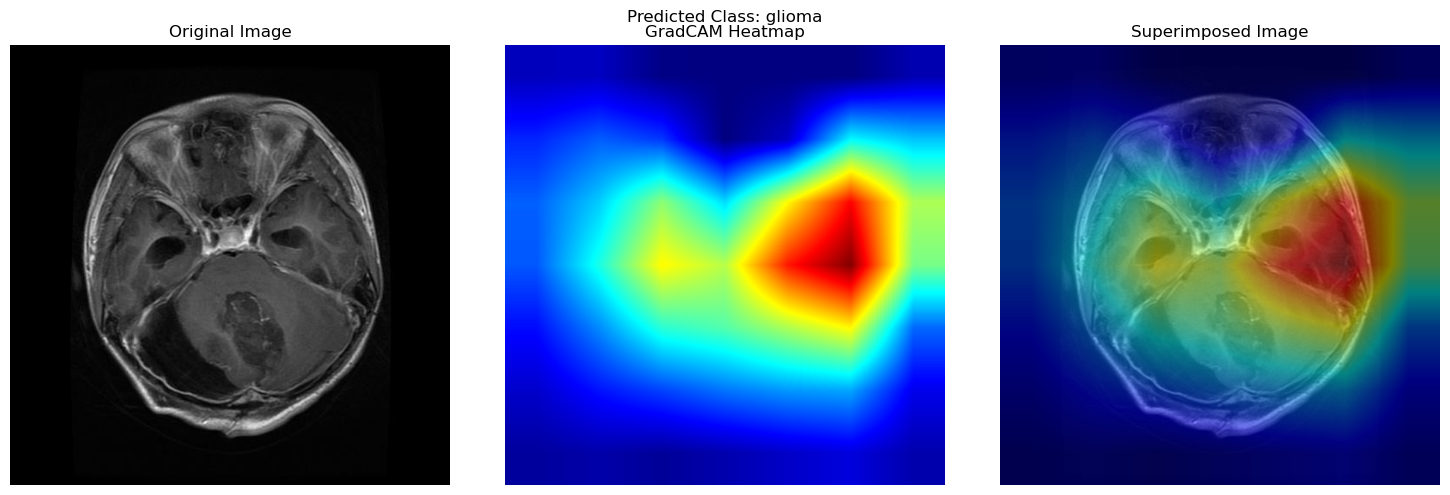


Diagnosis Results:
Classification: glioma
Confidence: 100.00%

Class Probabilities:
pituitary: 0.00%
healthy brain: 0.00%
glioma: 100.00%
meningioma: 0.00%


In [62]:
image_pipeline(image_path = "/Users/academiccity/Documents/amokorankye/front end/server/test images/glioma.jpg", diagnosisArea = "Brain Tumors", model=comprehensive_model, target_layer=comprehensive_model.layer4[-1])